In [8]:
import os
import h5py
import numpy as np

def load_dataset():
    fn =  os.path.join('train_catvnoncat.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join('test_catvnoncat.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (209, 64, 64, 3)
X_test.shape= (50, 64, 64, 3)
y_train.shape= (209,)
y_test.shape= (50,)


In [9]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

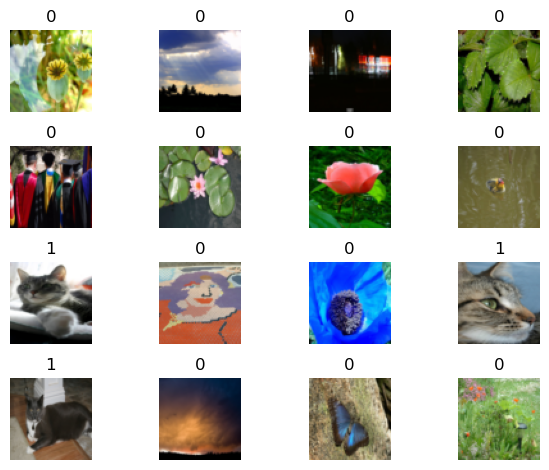

In [10]:
import matplotlib.pyplot as plt

plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [11]:
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train = X_train.reshape(m_train, -1)
X_test =  X_test.reshape(m_test, -1)

y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [12]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.fit_transform(X_test)

<font color = purple>

###  CODE FOR 1,2 and 3-LAYERS MLP CLASSIFIER
</font>



<font color = purple>

###  1layer MLP CLASSIFIER
</font>

In [14]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', activation='tanh', max_iter=100)
clf.fit(X_train_norm, y_train)

print("One layer train accuracy= {:.3%}".format(clf.score (X_train_norm,y_train)))
print("One layer test accuracy= {:.3%}".format(clf.score (X_test_norm,y_test)))

One layer train accuracy= 65.550%
One layer test accuracy= 34.000%


<font color = purple>

###  2-layers MLP CLASSIFIER
</font>

In [15]:
for activation in ['tanh', 'relu']:
    clf = MLPClassifier((3,3), solver='adam', activation=activation, max_iter=100)
    clf.fit(X_train_norm, y_train)
    
    print(f"\n{activation}")
    print("Two layers train accuracy= {:.3%}".format(clf.score (X_train_norm,y_train)))
    print("Two layers test accuracy= {:.3%}".format(clf.score (X_test_norm,y_test)))
    print("-" * 20)


tanh
Two layers train accuracy= 65.550%
Two layers test accuracy= 34.000%
--------------------

relu
Two layers train accuracy= 65.550%
Two layers test accuracy= 34.000%
--------------------


<font color = purple>

###  3-layers MLP CLASSIFIER
</font>

In [16]:
for activation in ['tanh', 'relu', 'relu']:
    clf = MLPClassifier((20,7,10), solver='adam', activation=activation, max_iter=300)
    clf.fit(X_train_norm, y_train)
    
    print(f"\n{activation}")
    print("three layers train accuracy= {:.3%}".format(clf.score (X_train_norm,y_train)))
    print("three layers test accuracy= {:.3%}".format(clf.score (X_test_norm,y_test)))
    print("-" * 20)


tanh
three layers train accuracy= 65.550%
three layers test accuracy= 34.000%
--------------------

relu
three layers train accuracy= 65.550%
three layers test accuracy= 34.000%
--------------------

relu
three layers train accuracy= 65.550%
three layers test accuracy= 34.000%
--------------------


### Compare with SVM 

In [17]:
from sklearn.svm import SVC

In [18]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_norm, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_norm, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_norm, y_test)))

train accuracy= 100.000%
test accuracy= 82.000%
